In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
salary=pd.read_csv('trainfile.csv')

In [3]:
salary.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


there are 18981 columns
all of type obejct 
there are 7 columns

In [5]:
salary_cpy=salary.copy()


In [6]:
salary_cpy.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [7]:
salary_cpy.columns=salary_cpy.columns.str.strip()

strip function is used to clear the spaces in front and back of the strings

In [8]:
salary_cpy.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [9]:
salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [10]:
salary_cpy=salary_cpy.dropna(subset=['HireDate'])
salary_cpy.isnull().sum() 

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate           0
AnnualSalary       0
GrossPay        3223
dtype: int64

In [11]:
salary_cpy=salary_cpy.drop('GrossPay',axis=1)

salary_cpy.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

In [12]:
salary_cpy.AgencyID.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02510      1
W02507      1
W02594      1
W02554      1
W02502      1
Name: AgencyID, Length: 1177, dtype: int64

THERE ARE 1177 AGENCIES. number of agenices should be same as agenices ids

In [13]:
salary_cpy.Agency.value_counts()

Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
HLTH-Health Dept Locatio       6
Legislative Reference          5
Special City Services          4
M-R Cable & Comm               4
Name: Agency, Length: 65, dtype: int64

SINGLE AGENCY HAVE MUTLIPLE IDS 

In [14]:
salary_cpy.JobTitle.value_counts()

AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
FIRE SUPPLY COORDINATOR              1
COUNCIL REP PLANNING COMMISSIO       1
LEGAL OFFICER                        1
Fire Lieutenant, ALS                 1
CONTRACT PROCESSING SUPERVISOR       1
Name: JobTitle, Length: 1073, dtype: int64

In [15]:
salary_cpy.HireDate.value_counts()

05/21/2014    1478
06/10/2013     696
06/12/2012     541
06/07/2011     368
05/29/2014     347
              ... 
03/21/1989       1
03/23/2009       1
11/04/1984       1
02/14/2012       1
09/10/2013       1
Name: HireDate, Length: 4737, dtype: int64

In [16]:
salary_cpy['AnnualSalary']=salary_cpy['AnnualSalary'].apply(lambda x: (float)(str(x)[1:]))

In [17]:
salary_cpy.AnnualSalary.value_counts()

11310.0    4811
20800.0     325
29245.0     196
43999.0     169
44773.0     162
           ... 
35509.0       1
25945.0       1
51889.0       1
39600.0       1
86400.0       1
Name: AnnualSalary, Length: 1590, dtype: int64

In [18]:
salary_cpy['HireDay']=salary_cpy['HireDate'].apply(lambda x: (int)(str(x[3:5])))
salary_cpy['HireMonth']=salary_cpy['HireDate'].apply(lambda x: (int)(str(x[0:2])))
salary_cpy['HireYear']=salary_cpy['HireDate'].apply(lambda x:(int)(str(x[6:])))

In [19]:
salary_cpy['HireMonth']=salary_cpy['HireDate'].apply(lambda x: (int)(str(x[0:2])))
salary_cpy['HireYear']=salary_cpy['HireDate'].apply(lambda x:(int)(str(x[6:])))

In [19]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013


In [20]:
salary_cpy['JobTitle']=salary_cpy['JobTitle'].apply( lambda x: str(x).strip().replace("  "," "))
salary_cpy['Agency']=salary_cpy['Agency'].apply(lambda x : str(x).strip().replace("  "," "))
salary_cpy['AgencyID']=salary_cpy['AgencyID'].apply(lambda x: str(x).strip().replace("  "," "))

In [21]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013


In [22]:
salary_cpy['JobTitle']=salary_cpy['JobTitle'].apply( lambda x: str(x).upper())
salary_cpy['Agency']=salary_cpy['Agency'].apply(lambda x : str(x).upper())
salary_cpy['AgencyID']=salary_cpy['AgencyID'].apply(lambda x: str(x).upper())

In [25]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,YOUTH SUMMER,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",FACILITIES/OFFICE SERVICES II,A03031,OED-EMPLOYMENT DEV,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,STATES ATTORNEYS OFFICE,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-HEALTH DEPARTMENT,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,POLICE DEPARTMENT,07/24/2013,43999.0,24,7,2013


we can say that some of the salaries are way too far from the the other salaries

we can see that 75% salaries are around 60300. 
we need to remove the salaries which are higher than 150000

In [23]:
salary_cpy.shape

(18911, 9)

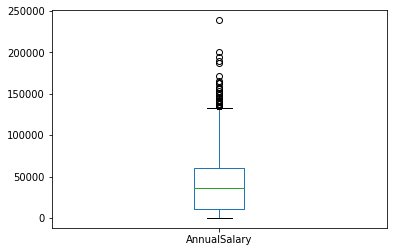

In [24]:
salary_cpy.AnnualSalary.plot.box()
plt.show()

In [25]:
salary_cpy=salary_cpy[salary_cpy['AnnualSalary']<150000]

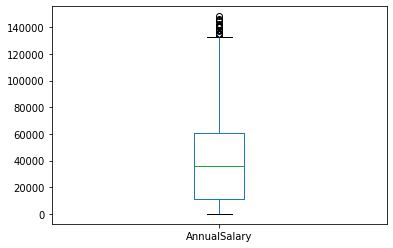

In [26]:
salary_cpy.AnnualSalary.plot.box()
plt.show()

In [27]:
salary_cpy=salary_cpy[salary_cpy['AnnualSalary']<140000]

In [28]:
salary_cpy.shape

(18885, 9)

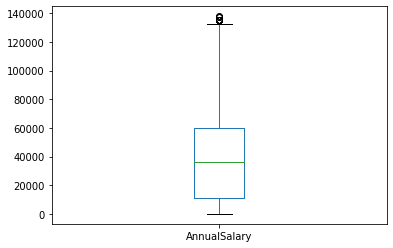

In [29]:
salary_cpy.AnnualSalary.plot.box()
plt.show()

In [30]:
salary_cpy.shape

(18885, 9)

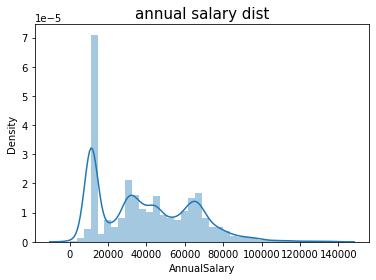

In [31]:
sns.distplot(salary_cpy.AnnualSalary)
plt.title('annual salary dist',fontsize=15)
plt.show()

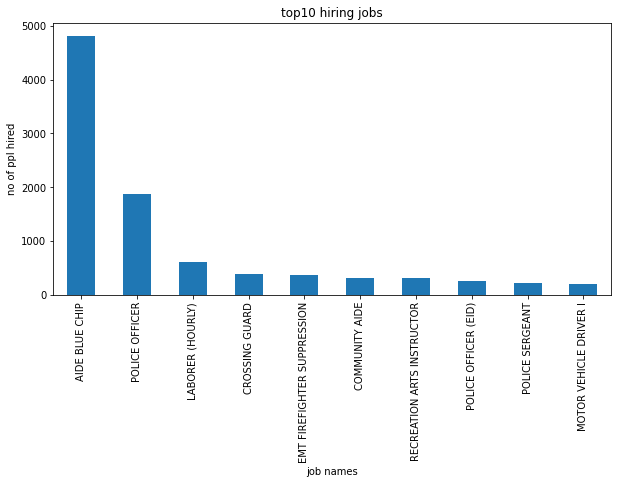

In [32]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['JobTitle'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('no of ppl hired')
plt.title('top10 hiring jobs')
plt.xlabel('job names')
plt.show()

most of the people were hired for aide blue chip job followed by police officer. other than these two all others have less than 1000 employeers

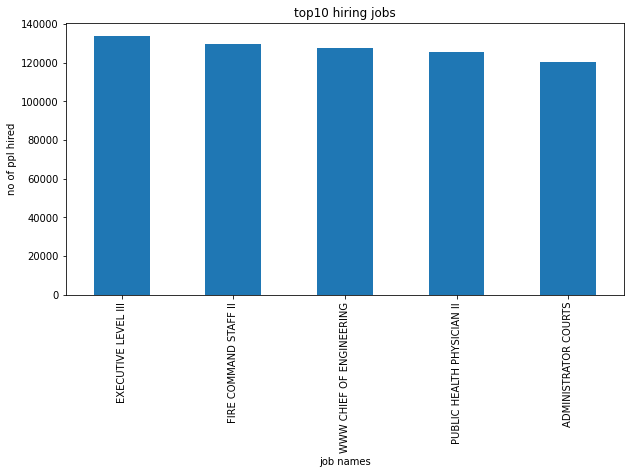

In [33]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending=False).head().plot.bar()
plt.ylabel('no of ppl hired')
plt.title('top10 hiring jobs')
plt.xlabel('job names')
plt.show() 

In [34]:
mean_sal=salary_cpy.AnnualSalary.mean()
good_paying_jobs=salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().reset_index()
good_paying_jobs[good_paying_jobs.AnnualSalary>mean_sal]['JobTitle'].count()

797

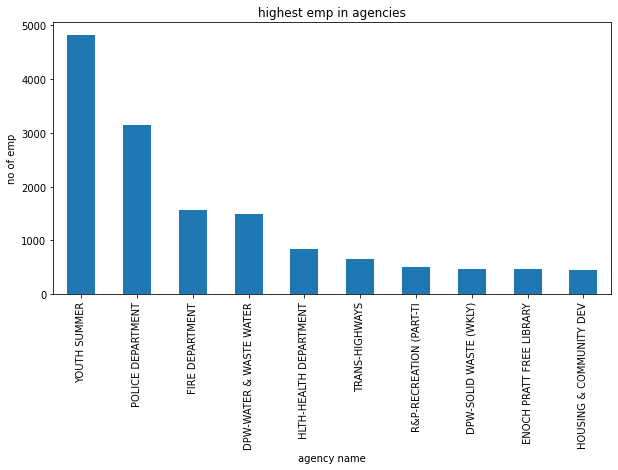

In [35]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['Agency'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.title('highest emp in agencies')
plt.xlabel('agency name')
plt.ylabel('no of emp')
plt.show()

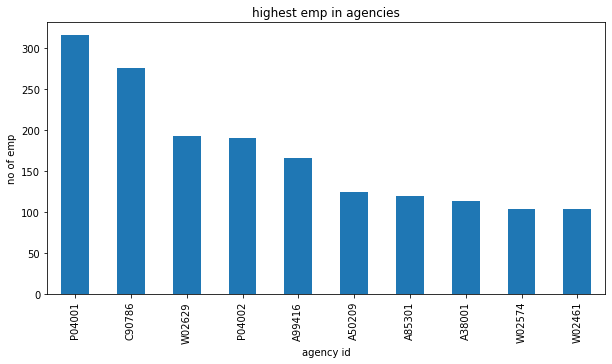

In [36]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['AgencyID'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.title('highest emp in agencies')
plt.xlabel('agency id')
plt.ylabel('no of emp')
plt.show()

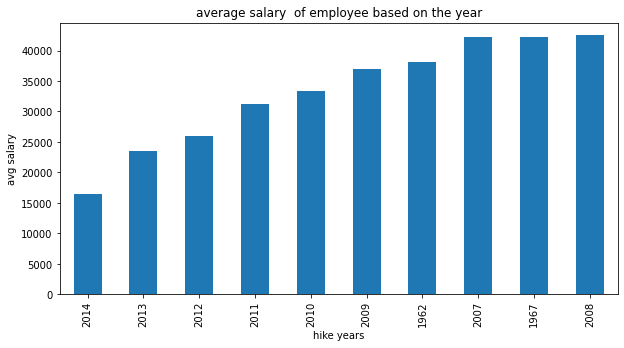

In [40]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireYear'])['AnnualSalary'].mean().sort_values().head(10).plot.bar()
plt.ylabel('avg salary')
plt.xlabel('hike years')
plt.title('average salary  of employee based on the year')
plt.show()

the above stat suggests that the avg salary depends upon the years of exp.so lets calculate the exp in a agency

Text(0.5, 1.0, 'average salary  of employee based on every month')

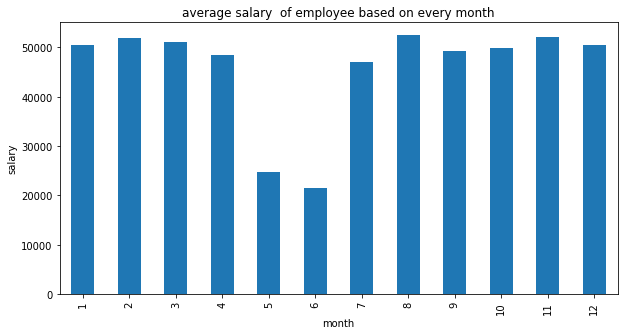

In [41]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireMonth'])['AnnualSalary'].mean().head(12).plot.bar()
plt.xlabel('month')
plt.ylabel('salary')
plt.title('average salary  of employee based on every month')

Text(0.5, 1.0, 'no of employees hired based on hire month')

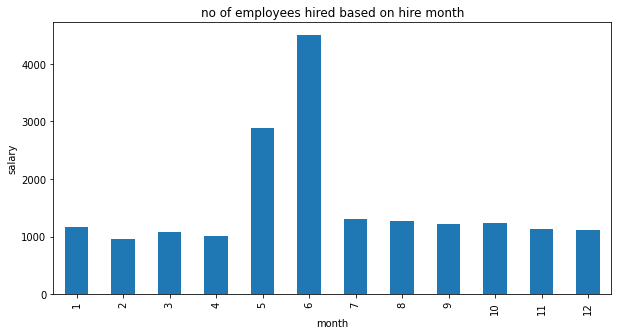

In [42]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireMonth'])['Name'].count().plot.bar()
plt.xlabel('month')
plt.ylabel('salary')
plt.title('no of employees hired based on hire month')

more employees were hired on may and june but paid relatively very less

<Figure size 720x360 with 0 Axes>

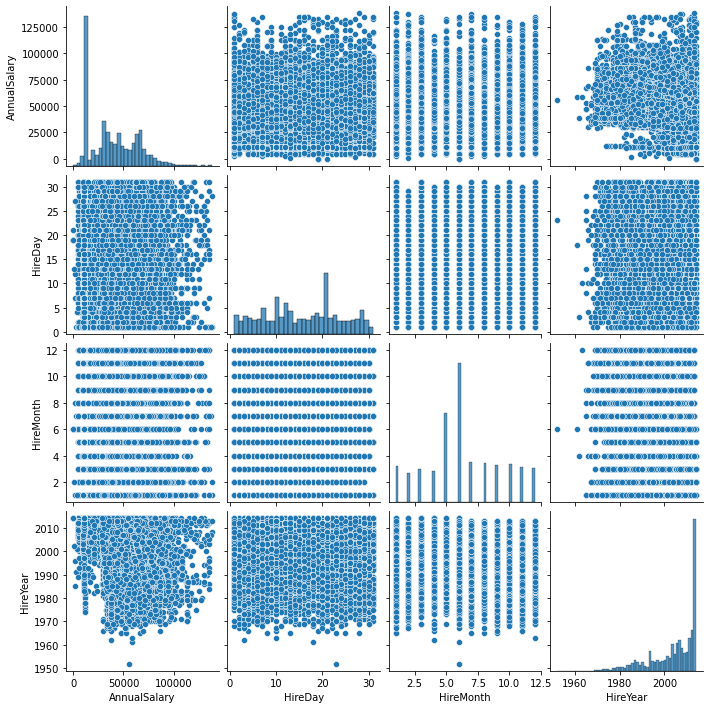

In [43]:
plt.figure(figsize=(10,5))
sns.pairplot(salary_cpy)
plt.show()

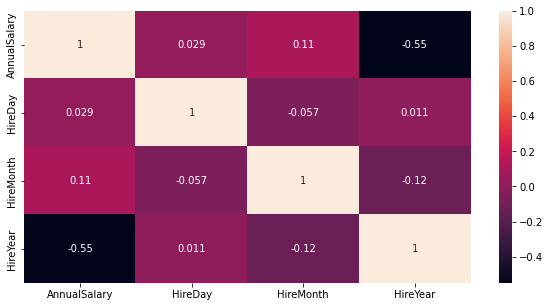

In [44]:
plt.figure(figsize=(10,5))
sns.heatmap(salary_cpy.corr(),annot=True)
plt.show()

feature engineering

In [42]:
salary_master=salary_cpy.copy()

In [43]:
mean_job= salary_master.groupby('JobTitle')['AnnualSalary'].mean()

In [44]:
salary_master['JobTitle']=salary_master['JobTitle'].map(mean_job)
salary_master['JobTitle']

0        11313.967200
1        47443.500000
2        69750.666667
3        57940.000000
4        44531.160494
             ...     
18976    11313.967200
18977    11313.967200
18978    44531.160494
18979    60588.139335
18980    53368.428571
Name: JobTitle, Length: 18885, dtype: float64

In [45]:
mean_agency= salary_master.groupby('Agency')['AnnualSalary'].mean()
salary_master['Agency']=salary_master['Agency'].map(mean_agency)
salary_master['Agency']

0        11313.967200
1        51495.424242
2        64874.560224
3        39980.900360
4        61481.005417
             ...     
18976    11313.967200
18977    11313.967200
18978    61481.005417
18979    61481.005417
18980    42565.513078
Name: Agency, Length: 18885, dtype: float64

In [46]:
mean_agencyid= salary_master.groupby('AgencyID')['AnnualSalary'].mean()
salary_master['AgencyID']=salary_master['AgencyID'].map(mean_agencyid)
salary_master['AgencyID']

0        11310.000000
1        46667.000000
2        65926.133333
3        48071.851064
4        44012.307229
             ...     
18976    11310.000000
18977    11310.000000
18978    44012.307229
18979    60203.340426
18980    42407.562500
Name: AgencyID, Length: 18885, dtype: float64

In [47]:
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18885 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18885 non-null  object 
 1   JobTitle      18885 non-null  float64
 2   AgencyID      18885 non-null  float64
 3   Agency        18885 non-null  float64
 4   HireDate      18885 non-null  object 
 5   AnnualSalary  18885 non-null  float64
 6   HireDay       18885 non-null  int64  
 7   HireMonth     18885 non-null  int64  
 8   HireYear      18885 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


In [48]:
salary_master= salary_master.drop(['HireDate','Name'],axis=1)

salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18885 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JobTitle      18885 non-null  float64
 1   AgencyID      18885 non-null  float64
 2   Agency        18885 non-null  float64
 3   AnnualSalary  18885 non-null  float64
 4   HireDay       18885 non-null  int64  
 5   HireMonth     18885 non-null  int64  
 6   HireYear      18885 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.2 MB


In [56]:
salary_train,salary_test=train_test_split(salary_master,train_size=0.7,random_state=10)

In [57]:
print(salary_train.shape)
print(salary_test.shape )

(13219, 7)
(5666, 7)


In [58]:
y_train=salary_train.pop('AnnualSalary')
x_train=salary_train

y_test=salary_test.pop('AnnualSalary')
x_test=salary_test

In [59]:
x_train 

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
2110,21570.423841,21474.446429,31494.602740,26,3,2007
7529,11313.967200,11310.000000,11313.967200,16,6,2014
15366,11313.967200,11310.000000,11313.967200,10,6,2013
3237,11313.967200,11310.000000,11313.967200,11,6,2009
16659,11313.967200,11310.000000,11313.967200,19,6,2014
...,...,...,...,...,...,...
9453,11313.967200,11310.000000,11313.967200,21,5,2014
7371,29925.666667,33754.400000,31594.490526,4,3,2002
17822,34098.128205,38263.434783,31494.602740,27,5,1999
7373,42275.081081,62661.900000,62661.900000,6,10,1969


In [60]:
scaler=StandardScaler()
x_train[x_train.columns]=scaler.fit_transform(x_train[x_train.columns])
x_train.describe()


,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
count,1.321900e+04,1.321900e+04,1.321900e+04,1.321900e+04,1.321900e+04,1.321900e+04
mean,1.054960e-16,8.526730e-16,2.849421e-16,1.531228e-16,-8.850541e-17,-7.982991e-15
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-1.546632e+00,-1.691969e+00,-1.397343e+00,-1.763380e+00,-1.822288e+00,-4.138882e+00
25%,-1.162446e+00,-1.272054e+00,-1.345816e+00,-8.086782e-01,-4.642147e-01,-5.827611e-01
50%,-1.457188e-01,9.319493e-02,1.459947e-01,2.668601e-02,-1.246964e-01,2.822413e-01
75%,8.700324e-01,9.033706e-01,1.048937e+00,7.427125e-01,8.938587e-01,8.589095e-01
max,3.889902e+00,2.886953e+00,1.959063e+00,1.816752e+00,1.912414e+00,9.550209e-01


In [61]:
x_test[x_test.columns]=scaler.fit_transform(x_test[x_test.columns])

In [65]:
example_df =pd.DataFrame({'Performance':[1,2,3,4,5,6],'Levels':[2,5,4,6,1,3],'Target':[100,300,200,600,200,500]})
example_df

,Performance,Levels,Target
0,1,2,100
1,2,5,300
2,3,4,200
3,4,6,600
4,5,1,200
5,6,3,500


In [67]:
example_lr=LinearRegression()
example_model=example_lr.fit(example_df[['Performance','Levels']],example_df['Target'])
example_model.score(example_df[['Performance','Levels']],example_df['Target'])

0.8579646017699115

In [68]:
print(example_lr.coef_)
print(example_lr.intercept_)

[70.83333333 75.83333333]
-196.66666666666669


In [69]:
lr=LinearRegression()

salary_reg=lr.fit(x_train,y_train)
salary_reg.score(x_train,y_train)

0.9652498067695455

In [70]:
salary_reg.score(x_test,y_test)

0.9647181159099966

In [73]:
print(salary_reg.coef_)
print(salary_reg.intercept_)

[22107.57351879  2772.01552827 -1638.49731197   -78.87693955
  -103.80442772 -2104.19216623]
39505.76539904681


In [74]:
salary_reg.predict(x_test)

array([58753.65393119, 10473.55438818, 10575.79726306, ...,
       57568.54532912, 65333.00342629, 11179.25048703])

In [75]:
y_test

9797     59409.0
4541     11310.0
2860     11310.0
8139     66231.0
2876     40303.0
          ...   
11213    40954.0
3366     69900.0
11606    57900.0
14382    65480.0
394      11310.0
Name: AnnualSalary, Length: 5666, dtype: float64